In [1]:
# Write a program to implement RNN

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Data import 
df = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
# first 5 entries
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
# Shape
df.shape

(1258, 6)

In [6]:
df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [8]:
training_set = df.iloc[:,[1,2]].values

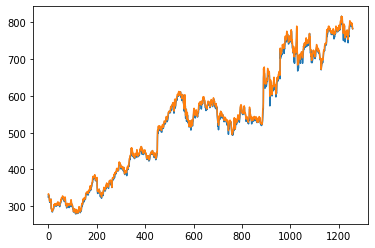

In [10]:
# Visualize the trend
plt.plot(training_set)

In [11]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_set_scaled = scaler.fit_transform(training_set)

In [12]:
# The scaled data
training_set_scaled

array([[0.08581368, 0.09640129],
       [0.09701243, 0.09834351],
       [0.09433366, 0.09251685],
       ...,
       [0.95725128, 0.95807422],
       [0.93796041, 0.94257381],
       [0.93688146, 0.93669113]])

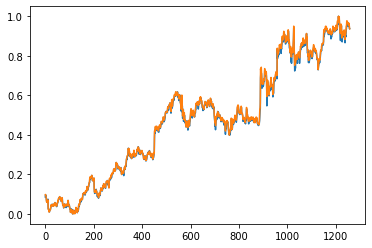

In [13]:
# plot the scaled data
plt.plot(training_set_scaled)

In [14]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
y_train.shape

(1198,)

In [19]:
X_train.shape

(1198, 60)

In [20]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
X_train.shape

(1198, 60, 1)

In [22]:
# Import the classes
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [23]:
# Create the model
regressor = Sequential()

In [27]:
# add LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True,
             input_shape = (X_train.shape[1], 1)))

In [28]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [29]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [30]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [31]:
# Output layer
regressor.add(Dense(1))

In [32]:
# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# Train the algorithm
regressor.fit(X_train, y_train, epochs=100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0354
Epoch 2/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0053
Epoch 9/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0039
Epoch 13/100
38/38

38/38 [==============================] - 4s 94ms/step - loss: 0.0012


In [34]:
testing_set = pd.read_csv('Google_Stock_Price_Test.csv')

In [35]:
testing_set.shape

(20, 6)

In [36]:
testing_set

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [37]:
real_stock_price = testing_set.iloc[:,[1,2]].values

In [38]:
real_stock_price

array([[778.81, 789.63],
       [788.36, 791.34],
       [786.08, 794.48],
       [795.26, 807.9 ],
       [806.4 , 809.97],
       [807.86, 809.13],
       [805.  , 808.15],
       [807.14, 807.39],
       [807.48, 811.22],
       [807.08, 807.14],
       [805.81, 806.21],
       [805.12, 809.48],
       [806.91, 806.91],
       [807.25, 820.87],
       [822.3 , 825.9 ],
       [829.62, 835.77],
       [837.81, 838.  ],
       [834.71, 841.95],
       [814.66, 815.84],
       [796.86, 801.25]])

In [42]:
dataset_total = pd.concat((df['Open'], 
                           testing_set['Open']), axis = 0)

In [43]:
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [45]:
inputs = dataset_total[len(dataset_total) - 
                       len(testing_set) - 60:].values

In [47]:
inputs.shape

(80,)

In [51]:
inputs = inputs.reshape(-1,2)

In [52]:
inputs.shape

(40, 2)

In [53]:
# Perform the scaling
inputs = scaler.transform(inputs)

In [54]:
inputs

array([[0.9299055 , 0.93086447],
       [0.92750577, 0.9439371 ],
       [0.93876032, 0.9337778 ],
       [0.93483518, 0.93112593],
       [0.94636878, 0.96556296],
       [0.97510976, 0.9595122 ],
       [0.97808617, 1.        ],
       [0.98076494, 0.97071731],
       [0.98450406, 0.96038994],
       [0.9371419 , 0.9281379 ],
       [0.90804747, 0.87670644],
       [0.92153434, 0.93784899],
       [0.93165414, 0.95235961],
       [0.88812412, 0.88593198],
       [0.87032145, 0.88518498],
       [0.90743359, 0.91538275],
       [0.89941588, 0.91773582],
       [0.9089404 , 0.90210469],
       [0.89456061, 0.91568155],
       [0.9132934 , 0.88936822],
       [0.86589404, 0.88987245],
       [0.90335962, 0.89601658],
       [0.91777662, 0.93149943],
       [0.94114145, 0.95745793],
       [0.96413424, 0.9638822 ],
       [0.96971501, 0.95058547],
       [0.96294367, 0.96108092],
       [0.95475854, 0.95185538],
       [0.95163331, 0.95708443],
       [0.93796041, 0.93663511],
       [0.